#### Problem Statement

The goal of text classification is to automatically classify the text documents into one or more defined categories. 

- Clue: You could use KNN ML algorithm to solve. Also start with concepts of NLP, then extract features from text files, then find out TF-IDF and split for classification.

- End result: You have to categorize news articles into defined topics. 

The dataset to be imported is fetch_20newsgroups of sklearn.

In [2]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset = 'all')
print('Number of articles:', str(len(news.data)))
print('Number of categories: ', str(len(news.target_names)))

Number of articles: 18846
Number of categories:  20


In [3]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

As you can see, there are 18 846 newsgroup documents, distributed across 20 different newsgroups. 

Our goal is to create a classifier that will classify each document based on its content. 

Let’s see the content of one document:

In [4]:
print('\n'.join(news.data[1120].split('\n')[:]))

From: kozloce@wkuvx1.bitnet
Subject: Re: Atlanta Hockey Hell!!DIR
Organization: Western Kentucky University, Bowling Green, KY
Lines: 18

> Someone give SportChannel a call (or maybe Ted Turner).
> Wasn't USA network covering the playoffs years ago?
> 
> Jim G.

Oh to be back in the good old days when I lived in Florida (Florida for
Petes sake!!) and could watch hockey every night as ESPN and USA alternated
coverage nights. Oh well I guess it would be too simple for the home office
to look back into their past to solve a problem in the present...

Of course I shouldn't complain. At least I'm getting to watch the playoffs
for a change. (Hooray!!) Now if the ESPN schedulers will realise there are
other teams except Pittsberg in the Patrick. (Sounds like a Dr Suess Book
=)

KOZ

LETS GO CAPS!!



##### Define training function

create a function for training and in each attempt save results and accuracies. You can define it like this:

In [6]:
from sklearn.model_selection import train_test_split
import time

def train(classifier, X, y):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    classifier.fit(X_train, y_train)
    end = time.time()

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    return classifier

###### Feature extraction

extract features in order to train a model and build a classifier called the multinomial Naive Bayes classifier

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

trial1 = Pipeline([ ('vectorizer', TfidfVectorizer()), ('classifier', MultinomialNB())])

train(trial1, news.data, news.target)

Accuracy: 0.8538461538461538, Time duration: 6.888262033462524


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [9]:
# lets scale the parameter by removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),('classifier', MultinomialNB())])

train(trial2, news.data, news.target)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kawba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Accuracy: 0.8806366047745358, Time duration: 6.566385746002197


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

The alpha parameter of the Naive-Bayes classifier is still the default one, so let’s change its value and iterate through a range of values. Then we check if the accuracy improves

In [10]:
for alpha in [5, 0.5, 0.05, 0.005, 0.0005]:
    trial3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),('classifier', MultinomialNB(alpha=alpha))])

train(trial3, news.data, news.target)


Accuracy: 0.9169761273209549, Time duration: 6.791370868682861


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB(alpha=0.0005))])

We can see that the best accuracy of 91.178% is achieved for alpha 0.005. we ignore the words that appear fewer than 5 times in all documents and use min_dif parameter:

In [11]:
trial4 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5)), ('classifier', MultinomialNB(alpha=0.005)) ])

train(trial4, news.data, news.target)

Accuracy: 0.910079575596817, Time duration: 6.014195680618286


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB(alpha=0.005))])

Resulting accuracy is a bit lower, so this was a bad idea. We can try and stem the data with nltk

In [12]:
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize

def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]

trial5 = Pipeline([ ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))), ('classifier', MultinomialNB(alpha=0.005))])

train(trial5, news.data, news.target)

C:\Users\kawba\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Accuracy: 0.9228116710875331, Time duration: 115.5232937335968


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function stemming_tokenizer at 0x000001EB14A8A160>)),
                ('classifier', MultinomialNB(alpha=0.005))])

In [14]:
#a diffferent model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

for classifier in [SGDClassifier(), LinearSVC()]:
    trial6 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), ('classifier', classifier)])

train(trial6, news.data, news.target)

Accuracy: 0.9320954907161804, Time duration: 10.232603549957275


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', LinearSVC())])

##### Model evaluation

Accuracy: 0.9352785145888595, Time duration: 18.60562515258789


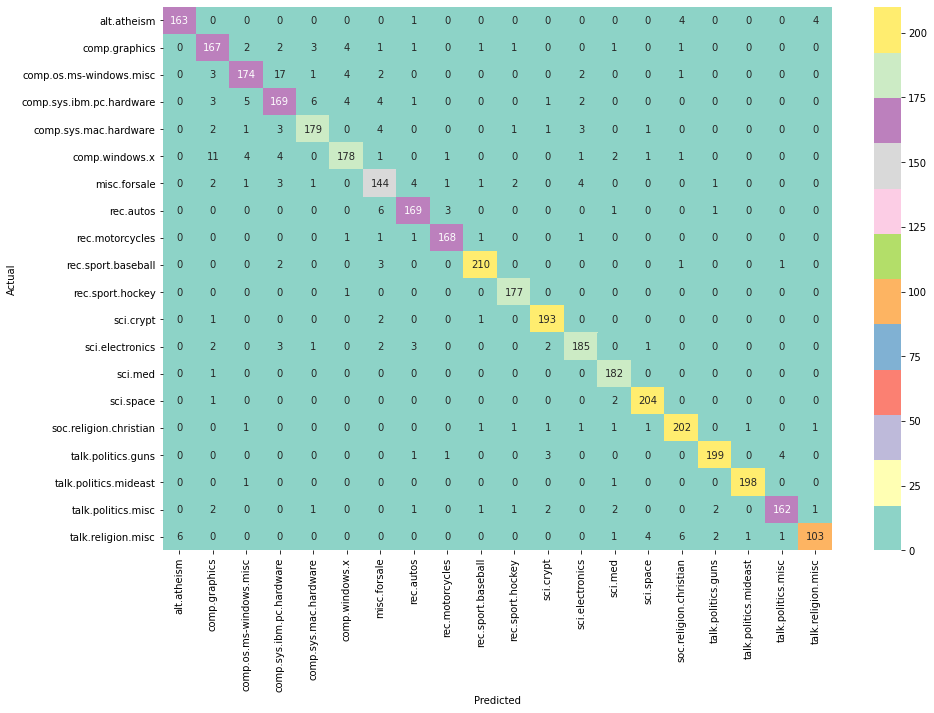

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

start = time.time()
classifier = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),('classifier', LinearSVC(C=10))])
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=11)
classifier.fit(X_train, y_train)
end = time.time()

print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

labels = news.target_names
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       0.96      0.95      0.96       172
           comp.graphics       0.86      0.91      0.88       184
 comp.os.ms-windows.misc       0.92      0.85      0.89       204
comp.sys.ibm.pc.hardware       0.83      0.87      0.85       195
   comp.sys.mac.hardware       0.93      0.92      0.93       195
          comp.windows.x       0.93      0.87      0.90       204
            misc.forsale       0.85      0.88      0.86       164
               rec.autos       0.93      0.94      0.93       180
         rec.motorcycles       0.97      0.97      0.97       173
      rec.sport.baseball       0.97      0.97      0.97       217
        rec.sport.hockey       0.97      0.99      0.98       178
               sci.crypt       0.95      0.98      0.96       197
         sci.electronics       0.93      0.93      0.93       199
                 sci.med       0.94      0.99      0.97       183
         

REF: https://krakensystems.co/blog/2018/text-classification